## Linear Regression
Linear Regression predictions are continous (numbers in a range)

#### Import all the packages

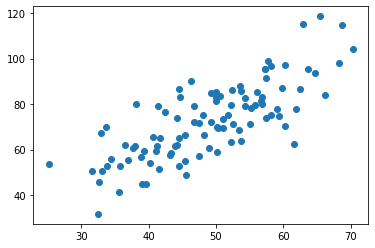

In [2]:
%matplotlib inline

import torch
from torch.autograd import Variable

import pandas as pd
import matplotlib.pyplot as plt

# datatype for tensors
dtype = torch.FloatTensor

# Get the data
data = pd.read_csv('data.csv', delimiter=',')
x_data = data['x']
y_data = data['y']

# The equation of regression line : y = wX + b
y = Variable(torch.Tensor(y_data).type(dtype), requires_grad=False)
X = Variable(torch.Tensor(x_data).type(dtype), requires_grad=False)

# plot our data
plt.scatter(X.data.numpy(), y.data.numpy())

### Training
- make predictions
- compute the loss
- compute the gradient using backward propagation
- update the parameters (w, b)

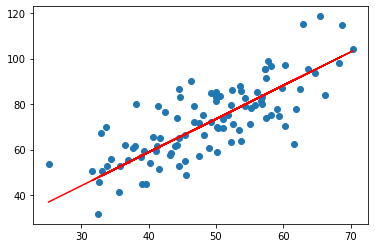

In [3]:
w = Variable(torch.zeros(1).type(dtype), requires_grad=True)
b = Variable(torch.zeros(1).type(dtype), requires_grad=True)

learning_rate = 1e-6

lst_w, lst_b = w, b
for itr in range(1000):
    pred_y = X.mul(w).add(b) # y =wX + b
    loss = (y - pred_y).pow(2).mean() # mean squared error
    loss.backward() # compute the gradient
    # update the parameters
    w.data -= learning_rate * w.grad.data # update weight w
    b.data -= learning_rate * b.grad.data  # update bias b
    w.grad.data.zero_() # manually reset the gradient buffers
    b.grad.data.zero_() 
    lst_w, lst_b = w, b # get the last value of w and b

y_points = lst_w.data.numpy() * X.data.numpy() + lst_b.data.numpy() # plot points

# plot our data
plt.scatter(X.data.numpy(), y.data.numpy())
plt.plot(X.data.numpy(), y_points, 'r')